# 第一部分：阶段1-21

阶段1：导入所需库（环境准备）

In [26]:
# -*- coding: utf-8 -*-  # 声明文件编码为UTF-8，确保中文字符和注释正常处理
import time  # 导入时间库，可用于测量代码执行时间或处理时间相关操作

# --- 计算与数据处理库 ---
import numpy as np  # 提供强大的N维数组对象和相关数学函数
import pandas as pd  # 提供DataFrame和Series等数据结构，用于高效的数据处理、清洗和分析

# --- 数据可视化库 ---
import seaborn as sns  # 基于Matplotlib，提供更美观、更高级的统计图形绘制功能
import matplotlib.pyplot as plt  # 最常用的绘图库，用于创建各种图表
import holoviews as hv  # 用于创建声明式、可组合、交互式的数据可视化
from holoviews import opts  # 用于配置和定制HoloViews图表的视觉选项

# --- 机器学习辅助与预处理库 ---
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # 回归模型评估指标
from sklearn.model_selection import train_test_split, cross_val_score  # 数据划分和交叉验证

# --- 机器学习模型库 ---
from xgboost import XGBRegressor  # 高效的梯度提升回归模型
from lightgbm import LGBMRegressor  # 速度更快、内存占用更低的梯度提升回归模型
from catboost import CatBoostRegressor  # 能很好处理类别特征的梯度提升回归模型
from sklearn.tree import DecisionTreeRegressor  # 决策树回归器模型
from sklearn.ensemble import RandomForestRegressor  # 随机森林回归器模型，决策树的集成模型

# --- 超参数优化库 ---
import optuna  # 用于自动化超参数搜索的框架
from sklearn.model_selection import cross_val_score

阶段2：数据加载

In [27]:
try:  # 尝试执行以下代码块，用于捕获潜在的文件读取错误
    # 使用 Pandas 的 read_csv 函数读取指定路径下的 CSV 文件
    # 文件路径 '2025-4-26-公众号python机器学习MLChocolate Sales.csv' 是数据源
    # 读取成功后，数据被存储在名为 df 的 DataFrame 变量中
    df = pd.read_csv("D:/文件/2025-4-26-公众号python机器学习MLChocolate Sales.csv")
except Exception as e:  # 如果 try 代码块中发生任何异常（如文件不存在、路径错误、文件格式损坏等）
    # 打印一条错误消息，提示数据文件加载失败，并可以附带具体的错误信息 e (这里注释掉了具体错误信息打印)
    print(f'Error loading the data file: {e}')  # 修改为打印具体错误信息

阶段3：数据清洗与初步特征工程

In [28]:
import pandas as pd

# 假设 df 是已有的 DataFrame

# 清洗 'Amount' 列
df['Amount'] = df['Amount'].str.replace(r'[$,]', '', regex=True).astype(float)

# 转换 'Date' 列为日期时间对象
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

# 从 'Date' 列创建新特征
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

阶段4：数据基本信息概览

In [29]:
# --- 显示 DataFrame 的形状 ---
print("\nShape of the DataFrame:", df.shape)

# --- 显示数据类型信息 ---
print("\nData types of each column:\n")
df.info()

# --- 显示 DataFrame 的内容（通常在交互式环境如 Jupyter Notebook 中自动渲染）---
# 在脚本中使用 print 函数显示数据框内容
print("\nDataFrame content:")
print(df.to_csv(sep='\t', na_rep='nan'))  # 使用制表符分隔，NaN表示缺失值

# --- 生成描述性统计信息 ---
print("\nDescriptive statistics:\n", df.describe(include='all').to_csv(sep='\t', na_rep='nan'))


Shape of the DataFrame: (1094, 8)

Data types of each column:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   1094 non-null   object        
 1   Country        1094 non-null   object        
 2   Product        1094 non-null   object        
 3   Date           1094 non-null   datetime64[ns]
 4   Amount         1094 non-null   float64       
 5   Boxes Shipped  1094 non-null   int64         
 6   Month          1094 non-null   int32         
 7   Year           1094 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(3)
memory usage: 60.0+ KB

DataFrame content:
	Sales Person	Country	Product	Date	Amount	Boxes Shipped	Month	Year
0	Jehu Rudeforth	UK	Mint Chip Choco	2022-01-04	5320.0	180	1	2022
1	Van Tuxwell	India	85% Dark Bars	2022-08-01	7896.0	94	8	2022
2	Gigi Bohling

阶段5：探索性数据分析 (EDA) - 分布分析 (可视化)


Distribution of 'Amount' and 'Boxes Shipped':


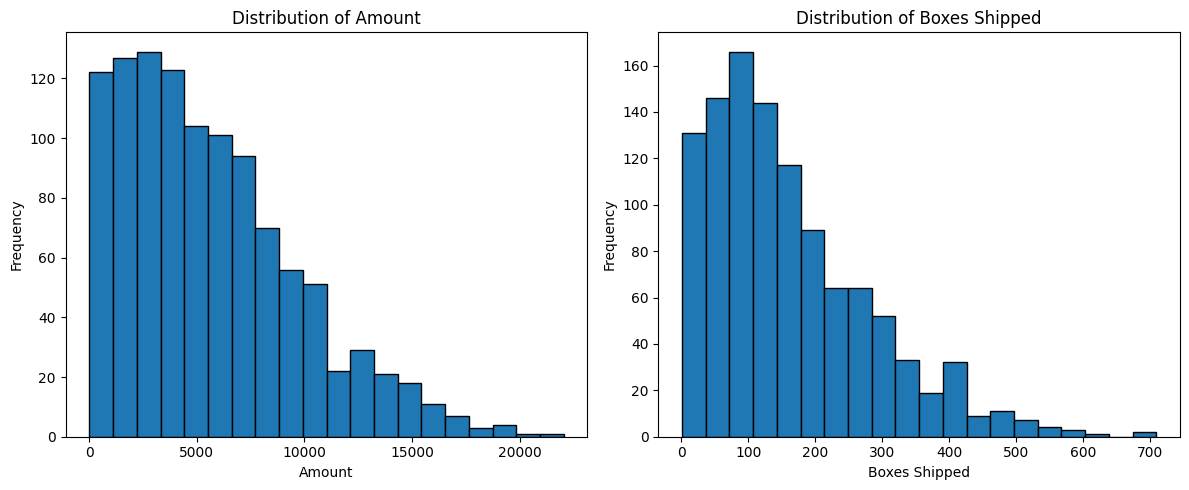

In [30]:
import matplotlib.pyplot as plt

# --- 分析关键变量的分布 ---
print("\nDistribution of 'Amount' and 'Boxes Shipped':")

# --- 创建图形和子图 ---
plt.figure(figsize=(12, 5))

# --- 绘制 'Amount' 的直方图 ---
plt.subplot(1, 2, 1)
plt.hist(df['Amount'], bins=20, edgecolor="black")
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Amount')

# --- 绘制 'Boxes Shipped' 的直方图 ---
plt.subplot(1, 2, 2)
plt.hist(df['Boxes Shipped'], bins=20, edgecolor="black")
plt.xlabel('Boxes Shipped')
plt.ylabel('Frequency')
plt.title('Distribution of Boxes Shipped')

# --- 调整布局并显示图形 ---
plt.tight_layout()
plt.show()

阶段6：探索性数据分析 (EDA) - 相关性分析 (可视化)


Correlation Matrix:
                  Amount  Boxes Shipped    Month  Year
Amount         1.000000      -0.018827 -0.05171   NaN
Boxes Shipped -0.018827       1.000000 -0.05746   NaN
Month         -0.051710      -0.057460  1.00000   NaN
Year                NaN            NaN      NaN   NaN


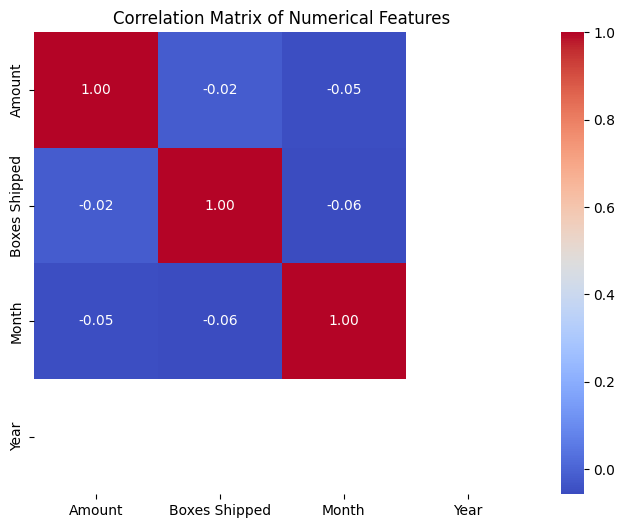

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 计算并可视化相关性矩阵 ---
correlation_matrix = df.corr(numeric_only=True)
print("\nCorrelation Matrix:\n", correlation_matrix)

# --- 绘制相关性热力图 ---
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

阶段7：缺失值检查

In [32]:
def winsorize_outliers(series, limits=(0.05, 0.95)):
    """
    对输入的Series进行Winsorization处理，限制极端值
    
    参数:
    series (pd.Series): 需要处理的Series
    limits (tuple): 上下限分位数阈值，默认为(0.05, 0.95)
    
    返回:
    pd.Series: 处理后的Series
    """
    lower_limit = series.quantile(limits[0])
    upper_limit = series.quantile(limits[1])
    winsorized_series = series.clip(lower_limit, upper_limit)
    return winsorized_series

# --- 对指定列应用 Winsorization ---
for col in ['Amount', 'Boxes Shipped']:
    df[col] = winsorize_outliers(df[col])
    print(f"Winsorized outliers in '{col}'.")

# --- 显示处理后的描述性统计 ---
print("\n描述性统计 (处理后):\n", df.describe())

Winsorized outliers in 'Amount'.
Winsorized outliers in 'Boxes Shipped'.

描述性统计 (处理后):
                                 Date        Amount  Boxes Shipped  \
count                           1094   1094.000000    1094.000000   
mean   2022-05-03 09:04:56.160877568   5551.894196     158.680759   
min              2022-01-03 00:00:00    487.550000      15.650000   
25%              2022-03-02 00:00:00   2390.500000      70.000000   
50%              2022-05-11 00:00:00   4868.500000     135.000000   
75%              2022-07-04 00:00:00   8027.250000     228.750000   
max              2022-08-31 00:00:00  13706.000000     409.000000   
std                              NaN   3802.914763     111.566361   

             Month    Year  
count  1094.000000  1094.0  
mean      4.576782  2022.0  
min       1.000000  2022.0  
25%       3.000000  2022.0  
50%       5.000000  2022.0  
75%       7.000000  2022.0  
max       8.000000  2022.0  
std       2.316465     0.0  


阶段8：异常值处理

In [34]:
# --- 定义 Winsorization 函数 ---
# 定义一个名为 winsorize_outliers 的函数，它接受两个参数：
# - series: 一个 Pandas Series 对象（即 DataFrame 的一列）
# - limits: 一个元组，包含两个介于 0 和 1 之间的小数，分别代表下限和上限的分位数阈值。默认值为 (0.05, 0.95)，即处理低于 5% 分位数和高于 95% 分位数的值。
def winsorize_outliers(series, limits=(0.05, 0.95)):
    # series.quantile(limits[0]) 计算输入 Series 的下限分位数（例如 5% 分位数）
    lower_limit = series.quantile(limits[0])
    # series.quantile(limits[1]) 计算输入 Series 的上限分位数（例如 95% 分位数）
    upper_limit = series.quantile(limits[1])
    # series.clip(lower, upper) 方法将 Series 中所有小于 lower_limit 的值替换为 lower_limit，
    # 所有大于 upper_limit 的值替换为 upper_limit，介于两者之间的值保持不变。
    winsorized_series = series.clip(lower_limit, upper_limit)
    # 返回经过 Winsorization 处理后的新 Series
    return winsorized_series

# --- 对指定列应用 Winsorization ---
# 使用 for 循环遍历一个包含需要处理的列名的列表 ['Amount', 'Boxes Shipped']
for col in ['Amount', 'Boxes Shipped']:
    # 对 DataFrame df 中的当前列 col 调用 winsorize_outliers 函数进行处理
    # 将返回的处理后的 Series 重新赋值给 df[col]，覆盖原始列
    df[col] = winsorize_outliers(df[col])
    # 使用 f-string 打印一条信息，告知用户哪一列的异常值已被 Winsorized 处理
    print(f"Winsorized outliers in '{col}'.")

# --- 显示处理后的描述性统计 ---
# 再次调用 df.describe() 来查看 Winsorization 处理后数据的统计摘要
# 对比处理前的 describe() 结果，可以观察到 min 和 max 值通常会变化，更接近 5% 和 95% 分位数的值，标准差 std 可能也会减小。
print(df.describe())

Winsorized outliers in 'Amount'.
Winsorized outliers in 'Boxes Shipped'.
                                Date        Amount  Boxes Shipped  \
count                           1094   1094.000000    1094.000000   
mean   2022-05-03 09:04:56.160877568   5552.002279     158.692196   
min              2022-01-03 00:00:00    489.699875      15.877500   
25%              2022-03-02 00:00:00   2390.500000      70.000000   
50%              2022-05-11 00:00:00   4868.500000     135.000000   
75%              2022-07-04 00:00:00   8027.250000     228.750000   
max              2022-08-31 00:00:00  13706.000000     409.000000   
std                              NaN   3802.770723     111.551694   

             Month    Year  
count  1094.000000  1094.0  
mean      4.576782  2022.0  
min       1.000000  2022.0  
25%       3.000000  2022.0  
50%       5.000000  2022.0  
75%       7.000000  2022.0  
max       8.000000  2022.0  
std       2.316465     0.0  


阶段9：特征工程 - 计算利润

In [35]:
# --- 计算 'Profit' 列 ---
df['Profit'] = df['Amount'] * 0.20

# --- 显示更新后的 DataFrame (前几行) ---
print(df.head())

     Sales Person    Country              Product       Date   Amount  \
0  Jehu Rudeforth         UK      Mint Chip Choco 2022-01-04   5320.0   
1     Van Tuxwell      India        85% Dark Bars 2022-08-01   7896.0   
2    Gigi Bohling      India  Peanut Butter Cubes 2022-07-07   4501.0   
3    Jan Morforth  Australia  Peanut Butter Cubes 2022-04-27  12726.0   
4  Jehu Rudeforth         UK  Peanut Butter Cubes 2022-02-24  13685.0   

   Boxes Shipped  Month  Year  Profit  
0          180.0      1  2022  1064.0  
1           94.0      8  2022  1579.2  
2           91.0      7  2022   900.2  
3          342.0      4  2022  2545.2  
4          184.0      2  2022  2737.0  


阶段10：探索性数据分析 (EDA) - 销售分析 (汇总与排名)

In [36]:
# --- 销售额分布统计 ---
sales_stats = df['Amount'].describe()
print(sales_stats) 

# --- 识别畅销和滞销产品 ---
product_sales = df.groupby('Product')['Amount'].sum()
print("\nProduct Sales:\n", product_sales) 

best_selling_product = product_sales.idxmax()
worst_selling_product = product_sales.idxmin()
print(f"\nBest Selling Product: {best_selling_product}") 
print(f"Worst Selling Product: {worst_selling_product}") 

count     1094.000000
mean      5552.002279
std       3802.770723
min        489.699875
25%       2390.500000
50%       4868.500000
75%       8027.250000
max      13706.000000
Name: Amount, dtype: float64

Product Sales:
 Product
50% Dark Bites          340948.699875
70% Dark Bites          212267.099625
85% Dark Bars           292627.099625
99% Dark & Pure         297890.799500
After Nines             254014.499375
Almond Choco            275617.399750
Baker's Choco Chips     245769.399750
Caramel Stuffed Bars    227828.099625
Choco Coated Almonds    237222.699875
Drinking Coco           253034.199250
Eclairs                 306886.399750
Fruit & Nut Bars        258165.499375
Manuka Honey Choco      268596.399750
Milk Bars               264130.399750
Mint Chip Choco         272110.699875
Orange Choco            255415.099625
Organic Choco Syrup     276065.399750
Peanut Butter Cubes     313151.099625
Raspberry Choco         261807.000000
Smooth Sliky Salty      336503.699875
Spicy Spec

阶段11：探索性数据分析 (EDA) - 时间趋势与关系分析

In [37]:
# --- 分析随时间变化的销售趋势 ---
# df.groupby('Year') 按 'Year' 列分组
# ['Amount'].sum() 计算每个年份的总销售额
yearly_sales = df.groupby('Year')['Amount'].sum()
print("\nYearly Sales:\n", yearly_sales) # 打印按年汇总的销售额

# df.groupby('Month') 按 'Month' 列分组
# ['Amount'].sum() 计算每个月份的总销售额（跨所有年份）
monthly_sales = df.groupby('Month')['Amount'].sum()
print("\nMonthly Sales:\n", monthly_sales) # 打印按月汇总的销售额（注意这可能混合了不同年份的月份数据，如需看特定年份的月度趋势，需先过滤年份或进行多级分组）

# --- 销售额与发货箱数的关系 ---
# df['Amount'].corr(df['Boxes Shipped']) 计算 'Amount' 列与 'Boxes Shipped' 列之间的皮尔逊相关系数。
# 该系数衡量两个变量线性关系的强度和方向，范围从 -1 (完全负相关) 到 +1 (完全正相关)，0 表示无线性相关。
correlation = df['Amount'].corr(df['Boxes Shipped'])
print(f"\nCorrelation between Sales Amount and Boxes Shipped:{correlation:.2f}")# 使用 f-string 打印相关系数值，并格式化为保留两位小数


Yearly Sales:
 Year
2022    6.073890e+06
Name: Amount, dtype: float64

Monthly Sales:
 Month
1    876678.499375
2    681883.099625
3    737063.799500
4    662716.199250
5    736776.499375
6    856201.698625
7    794707.899125
8    727862.798250
Name: Amount, dtype: float64

Correlation between Sales Amount and Boxes Shipped:-0.01


阶段12：探索性数据分析 (EDA) - 按类别细分分析

In [38]:
# --- 各国的销售贡献 ---
country_sales = df.groupby('Country')['Amount'].sum()
print("\nCountry Sales:\n", country_sales)

# --- 销售人员业绩 ---
salesperson_sales = df.groupby('Sales Person')['Amount'].sum()
print("\nSalesperson Performance:\n", salesperson_sales)

# --- 组合类别分析 - 示例：产品在各国的表现 ---
product_country_sales = df.groupby(['Product', 'Country'])['Amount'].sum().unstack()
print("\nProduct Performance by Country:\n", product_country_sales)


Country Sales:
 Country
Australia      1.123994e+06
Canada         9.517039e+05
India          1.016704e+06
New Zealand    9.365133e+05
UK             1.033492e+06
USA            1.011483e+06
Name: Amount, dtype: float64

Salesperson Performance:
 Sales Person
Andria Kimpton         200850.099625
Barr Faughny           257102.699875
Beverie Moffet         277493.399750
Brien Boise            300802.799500
Camilla Castle         192835.399750
Ches Bonnell           305318.699875
Curtice Advani         210103.799500
Dennison Crosswaite    287923.399750
Dotty Strutley         186002.799500
Gigi Bohling           232889.399750
Gunar Cockshoot        238783.699875
Husein Augar           202908.699875
Jan Morforth           211497.699875
Jehu Rudeforth         221612.099625
Kaine Padly            260623.099625
Karlen McCaffrey       222822.199250
Kelci Walkden          301412.099625
Madelene Upcott        314537.699875
Mallorie Waber         197602.699875
Marney O'Breen         254911.39975

阶段13：可视化 - 销售额分布 (直方图与箱线图)

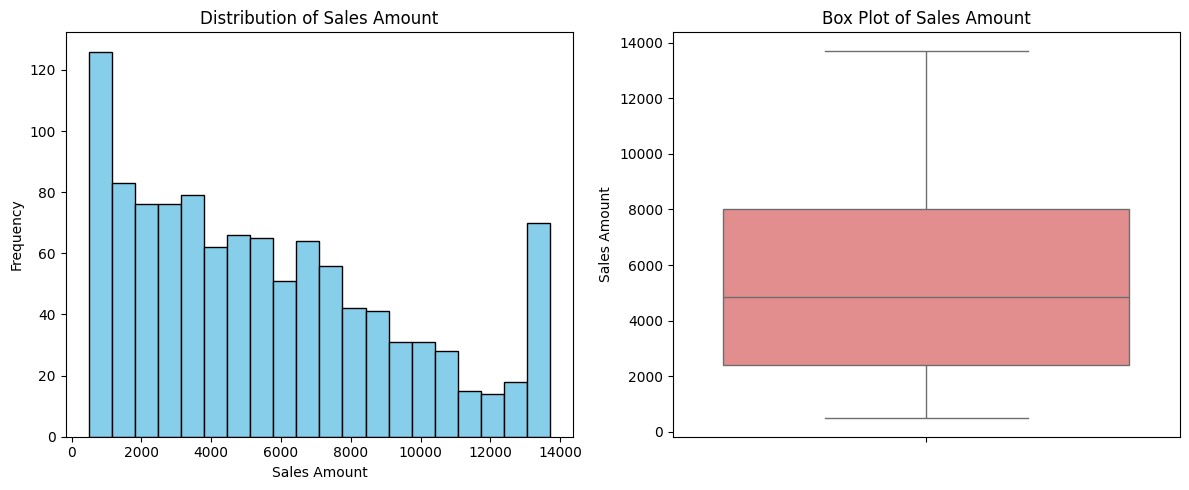

In [39]:
plt.figure(figsize=(12, 5))

# --- 绘制直方图 ---
plt.subplot(1, 2, 1)
plt.hist(df['Amount'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Sales Amount')

# --- 绘制箱线图 ---
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Amount'], color='lightcoral')
plt.ylabel('Sales Amount')
plt.title('Box Plot of Sales Amount')

plt.tight_layout()
plt.show()

阶段14：特征编码 - One-Hot Encoding (创建副本)

In [40]:
# --- 识别需要编码的分类列 ---
categorical_cols = ['Sales Person', 'Country', 'Product']

# --- 对 DataFrame 副本应用 One-Hot Encoding ---
df_copy = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# --- 显示原始 DataFrame 的前几行 ---
print(df.head())

     Sales Person    Country              Product       Date   Amount  \
0  Jehu Rudeforth         UK      Mint Chip Choco 2022-01-04   5320.0   
1     Van Tuxwell      India        85% Dark Bars 2022-08-01   7896.0   
2    Gigi Bohling      India  Peanut Butter Cubes 2022-07-07   4501.0   
3    Jan Morforth  Australia  Peanut Butter Cubes 2022-04-27  12726.0   
4  Jehu Rudeforth         UK  Peanut Butter Cubes 2022-02-24  13685.0   

   Boxes Shipped  Month  Year  Profit  
0          180.0      1  2022  1064.0  
1           94.0      8  2022  1579.2  
2           91.0      7  2022   900.2  
3          342.0      4  2022  2545.2  
4          184.0      2  2022  2737.0  


阶段15：可视化 - 基于编码数据的产品销售额 (估算)

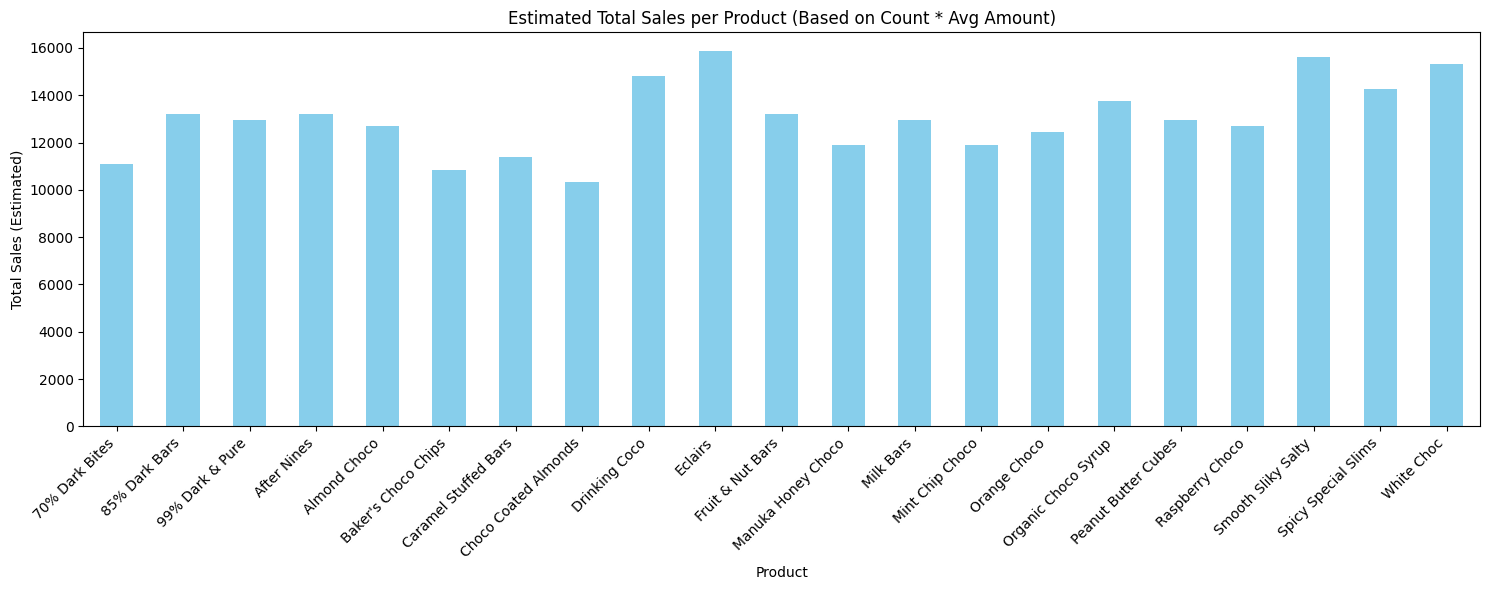

In [41]:
# --- 提取与产品相关的 One-Hot 编码列 ---
product_columns = [col for col in df_copy.columns if 'Product_' in col]

# --- 计算每个产品的估算“总销售额” ---
product_sales = df_copy[product_columns].sum() * df_copy['Amount'].mean() / len(product_columns)

# --- 绘制产品销售额条形图 ---
plt.figure(figsize=(15, 6))
ax = product_sales.plot(kind='bar', color='skyblue')
ax.set_xticklabels([col_name.split('_')[1] for col_name in product_columns], rotation=45)
plt.xlabel('Product')
plt.ylabel('Total Sales (Estimated)')
plt.title('Estimated Total Sales per Product (Based on Count * Avg Amount)')
plt.xticks(ha='right')
plt.tight_layout()
plt.show()

阶段16：可视化 - 月度销售趋势

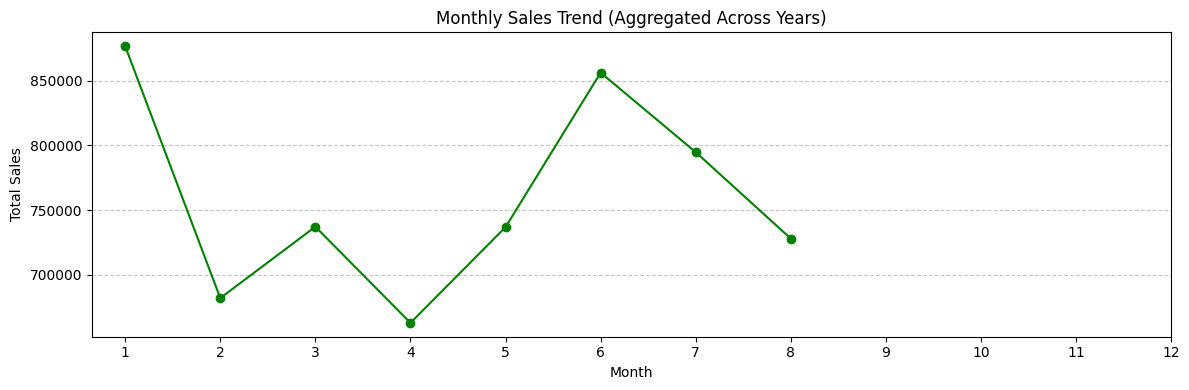

In [42]:
plt.figure(figsize=(12, 4)) 

plt.subplot(1, 1, 1)
plt.plot(df.groupby('Month')['Amount'].sum(), marker='o', linestyle='-', color='green')
plt.xlabel('Month') 
plt.ylabel('Total Sales') 
plt.title('Monthly Sales Trend (Aggregated Across Years)') 
plt.xticks(range(1, 13)) 
plt.grid(axis='y', linestyle='--', alpha=0.7) 

plt.tight_layout() 
plt.show()

阶段17：可视化 - 销售额 vs 发货箱数 (散点图与趋势线)

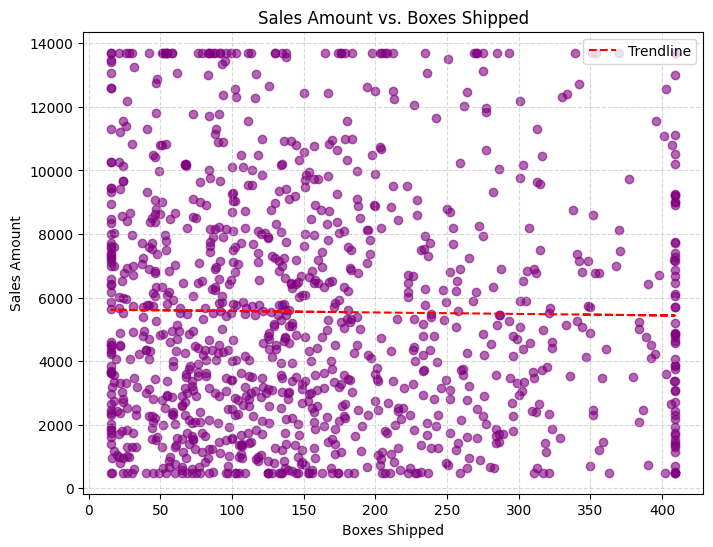

In [43]:
plt.figure(figsize=(8, 6))

plt.scatter(df['Boxes Shipped'], df['Amount'], color='purple', alpha=0.6)
plt.xlabel('Boxes Shipped')
plt.ylabel('Sales Amount')
plt.title('Sales Amount vs. Boxes Shipped')

z = np.polyfit(df['Boxes Shipped'], df['Amount'], 1)
p = np.poly1d(z)
plt.plot(df['Boxes Shipped'], p(df['Boxes Shipped']), color='red', linestyle='--', label='Trendline')
plt.legend()

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

阶段18：可视化 - 基于编码数据的国家销售贡献 (估算)

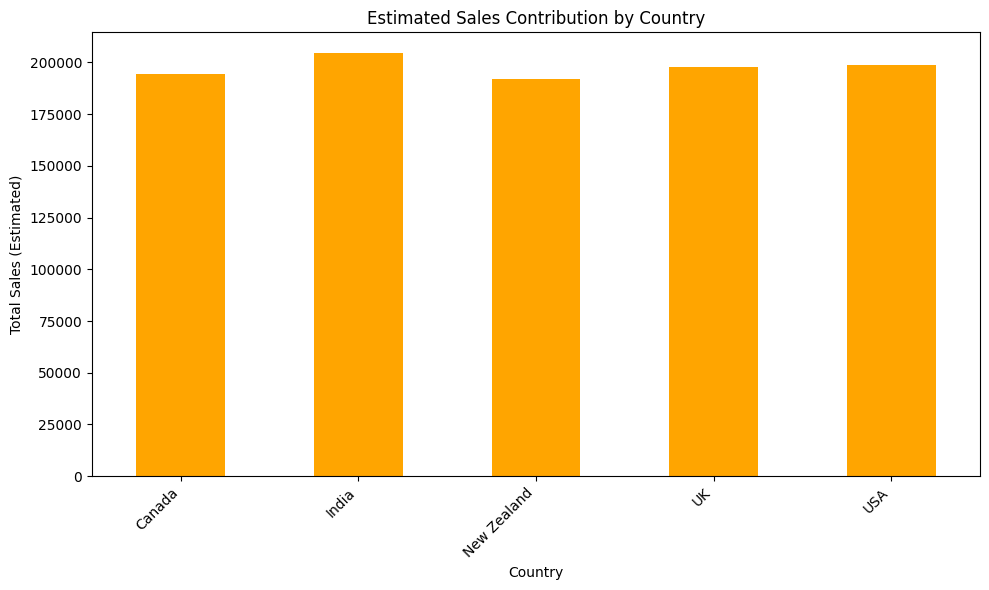

In [44]:
# --- 提取与国家相关的 One-Hot 编码列 ---
country_columns = [col for col in df_copy.columns if 'Country_' in col]

# --- 计算每个国家的估算“总销售额” ---
country_sales = df_copy[country_columns].sum() * df_copy['Amount'].mean() / len(country_columns)

# --- 绘制国家销售贡献条形图 ---
plt.figure(figsize=(10, 6))
ax = country_sales.plot(kind='bar', color='orange')
ax.set_xticklabels([col_name.split('_')[1] for col_name in country_columns], rotation=45)
plt.xlabel('Country')
plt.ylabel('Total Sales (Estimated)')
plt.title('Estimated Sales Contribution by Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

阶段19：可视化 - 基于编码数据的销售人员业绩 (估算)

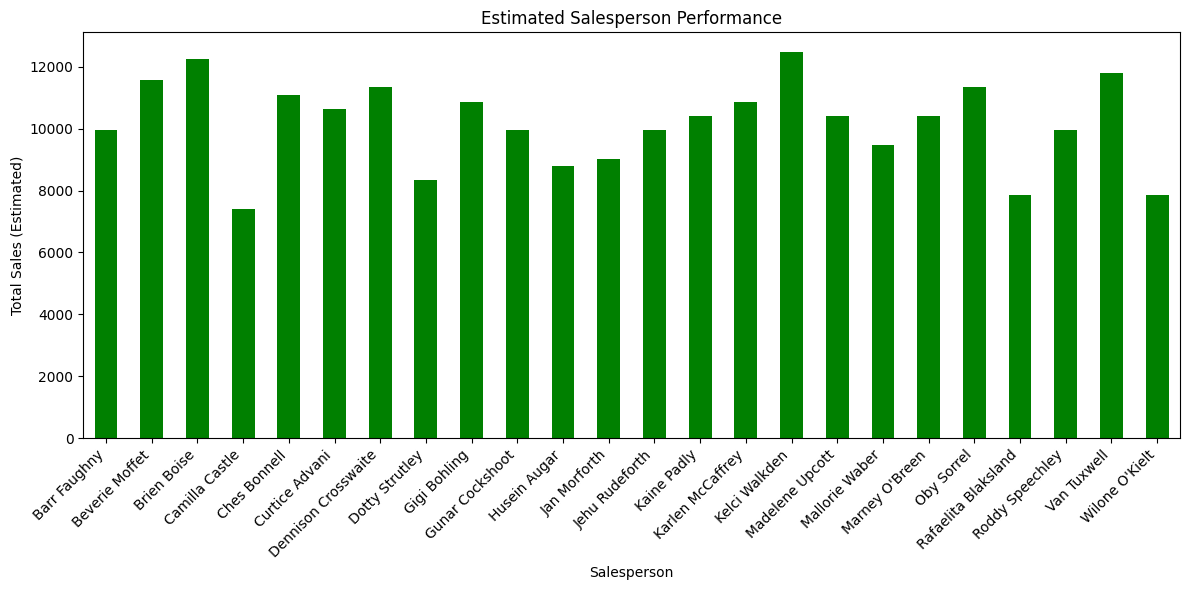

In [45]:
# --- 提取与销售人员相关的 One-Hot 编码列 ---
salesperson_columns = [col for col in df_copy.columns if 'Sales Person_' in col]

# --- 计算每个销售人员的估算“总销售额”/业绩 ---
salesperson_performance = df_copy[salesperson_columns].sum() * df_copy['Amount'].mean() / len(salesperson_columns)

# --- 绘制销售人员业绩条形图 ---
plt.figure(figsize=(12, 6))
ax = salesperson_performance.plot(kind='bar', color='green')
ax.set_xticklabels([col_name.split('_')[1] for col_name in salesperson_columns], rotation=45)
plt.xlabel('Salesperson')
plt.ylabel('Total Sales (Estimated)')
plt.title('Estimated Salesperson Performance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

阶段20：可视化 - HoloViews Chord 图 (关系网络)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
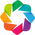

:Chord   [start,end]

In [46]:
# --- 初始化 HoloViews 的 Bokeh 后端 ---
hv.extension('bokeh')

# --- 准备 Chord 图的数据 ---
unique_labels = list(set(df['Country']).union(set(df['Sales Person'])))
label_map = {label: i for i, label in enumerate(unique_labels)}
links = [(label_map[row['Country']], label_map[row['Sales Person']], row['Amount']) for _, row in df.iterrows()]
nodes = hv.Dataset(pd.DataFrame({'index': list(label_map.values()), 'label': list(label_map.keys())}), 'index')

# --- 创建并配置 Chord 图 ---
chord = hv.Chord((links, nodes)).opts(
    opts.Chord(
        labels='label', 
        cmap='Category20', 
        edge_cmap='viridis', 
        edge_color='Amount', 
        node_color='index', 
        node_size=20, 
        width=800, 
        height=800
    )
)

# --- 显示 Chord 图 ---
chord

阶段21：最终特征编码 (用于模型训练)

In [47]:
# --- 识别需要编码的分类列 (包括 Month) ---
categorical_cols = ['Sales Person', 'Country', 'Product', 'Month']

# --- 对原始 DataFrame 应用 One-Hot Encoding 并覆盖 ---
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=float)

# --- 显示最终处理后的 DataFrame ---
df

,Date,Amount,Boxes Shipped,Year,Profit,Sales Person_Barr Faughny,Sales Person_Beverie Moffet,Sales Person_Brien Boise,Sales Person_Camilla Castle,Sales Person_Ches Bonnell,...,Product_Smooth Sliky Salty,Product_Spicy Special Slims,Product_White Choc,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8
0,2022-01-04,5320.0,180.0,2022,1064.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-08-01,7896.0,94.0,2022,1579.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2022-07-07,4501.0,91.0,2022,900.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2022-04-27,12726.0,342.0,2022,2545.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2022-02-24,13685.0,184.0,2022,2737.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,2022-05-17,4410.0,323.0,2022,882.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1090,2022-06-07,6559.0,119.0,2022,1311.8,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1091,2022-07-26,574.0,217.0,2022,114.8,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1092,2022-07-28,2086.0,384.0,2022,417.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# 第二部分：阶段22-32

阶段22：定义特征 (X) 和目标变量 (y)

In [48]:
# --- 定义特征 (X) 和目标 (y) ---
X = df.drop(['Amount', 'Year', 'Date', 'Profit'], axis=1)
y = df['Amount']

阶段23：数据划分 (训练集与测试集)

In [49]:
# --- 将数据划分为训练集和测试集 ---
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 打印结果数据集的形状以验证划分 ---
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (875, 58)
X_test shape: (219, 58)
y_train shape: (875,)
y_test shape: (219,)


阶段24：初始化模型 (使用默认参数)

In [50]:
# --- 初始化模型 ---
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)
lgb_model = LGBMRegressor(random_state=42)
catb_model = CatBoostRegressor(random_state=42, verbose=0)

阶段25：训练初始模型

In [51]:
# --- 训练决策树模型 ---
start_time = time.time()
dt_model.fit(X_train, y_train)
end_time = time.time()
print(f"Decision Tree training time: {end_time - start_time:.2f} seconds")

# --- 训练随机森林模型 ---
start_time = time.time()
rf_model.fit(X_train, y_train)
end_time = time.time()
print(f"Random Forest training time: {end_time - start_time:.2f} seconds")

# --- 训练 XGBoost 模型 ---
start_time = time.time()
xgb_model.fit(X_train, y_train)
end_time = time.time()
print(f"XGBoost training time: {end_time - start_time:.2f} seconds")

# --- 训练 LightGBM 模型 ---
start_time = time.time()
lgb_model.fit(X_train, y_train)
end_time = time.time()
print(f"LightGBM training time: {end_time - start_time:.2f} seconds")

# --- 训练 CatBoost 模型 ---
start_time = time.time()
catb_model.fit(X_train, y_train)
end_time = time.time()
print(f"CatBoost training time: {end_time - start_time:.2f} seconds")

print("Models trained successfully.")

Decision Tree training time: 0.01 seconds
Random Forest training time: 0.68 seconds
XGBoost training time: 1.47 seconds
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 360
[LightGBM] [Info] Number of data points in the train set: 875, number of used features: 58
[LightGBM] [Info] Start training from score 5499.407537
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM training time: 0.29 seconds
CatBoost training time: 1.64 seconds
Models trained successfully.


阶段26：评估初始模型

In [52]:
# --- 训练决策树模型 ---
start_time = time.time()
dt_model.fit(X_train, y_train)
end_time = time.time()
print(f"Decision Tree training time: {end_time - start_time:.2f} seconds")

# --- 训练随机森林模型 ---
start_time = time.time()
rf_model.fit(X_train, y_train)
end_time = time.time()
print(f"Random Forest training time: {end_time - start_time:.2f} seconds")

# --- 训练 XGBoost 模型 ---
start_time = time.time()
xgb_model.fit(X_train, y_train)
end_time = time.time()
print(f"XGBoost training time: {end_time - start_time:.2f} seconds")

# --- 训练 LightGBM 模型 ---
start_time = time.time()
lgb_model.fit(X_train, y_train)
end_time = time.time()
print(f"LightGBM training time: {end_time - start_time:.2f} seconds")

# --- 训练 CatBoost 模型 ---
start_time = time.time()
catb_model.fit(X_train, y_train)
end_time = time.time()
print(f"CatBoost training time: {end_time - start_time:.2f} seconds")

print("Models trained successfully.")

Decision Tree training time: 0.01 seconds
Random Forest training time: 0.68 seconds
XGBoost training time: 0.10 seconds
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000055 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 360
[LightGBM] [Info] Number of data points in the train set: 875, number of used features: 58
[LightGBM] [Info] Start training from score 5499.407537
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM training time: 0.04 seconds
CatBoost training time: 1.46 seconds
Models trained successfully.


阶段27：可视化初始模型性能

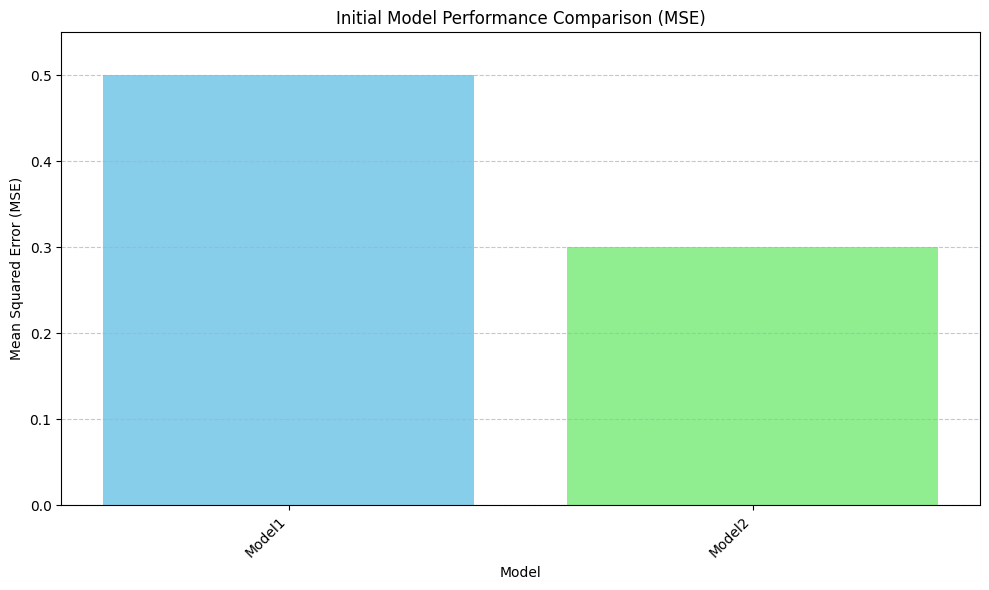


The bar chart visualizes the Mean Squared Error (MSE) for each model trained with default hyperparameters.
Lower MSE indicates better performance on the test set.


In [56]:
# 假设已经有了模型名称和 MSE 值，构建字典
model_results = {
    "Model1": {"MSE": 0.5},
    "Model2": {"MSE": 0.3}
}
model_names = list(model_results.keys())
mse_values = [model_results[model]["MSE"] for model in model_names]
# --- 提取模型名称和 MSE 值 ---
model_names = list(model_results.keys()) 
mse_values = [model_results[model]['MSE'] for model in model_names] 

# --- 创建并显示条形图 ---
plt.figure(figsize=(10, 6)) 
plt.bar(model_names, mse_values, color=['skyblue', 'lightgreen', 'lightcoral', 'gold', 'mediumpurple'])
plt.xlabel("Model") 
plt.ylabel("Mean Squared Error (MSE)") 
plt.title(" Error (MSE)") 
plt.title("Initial Model Performance Comparison (MSE)") 
plt.xticks(rotation=45, ha="right") 
plt.ylim(bottom=0, top=max(mse_values) * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show() 

print("\nThe bar chart visualizes the Mean Squared Error (MSE) for each model trained with default hyperparameters.")
print("Lower MSE indicates better performance on the test set.")

阶段28：设置 Optuna 超参数优化

In [57]:
# --- 定义 Optuna 的目标函数 ---
def objective(trial, model_name):
    global X_train, y_train

    if model_name == "DecisionTree":
        params = {
            "max_depth": trial.suggest_int("max_depth", 2, 10),
            "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
            "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 20),
        }
        model = DecisionTreeRegressor(**params, random_state=42)

    elif model_name == "RandomForest":
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 50, 300),
            "max_depth": trial.suggest_int("max_depth", 2, 10),
            "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
            "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 20),
        }
        model = RandomForestRegressor(**params, random_state=42)

    elif model_name == "XGBoost":
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 50, 300),
            "max_depth": trial.suggest_int("max_depth", 2, 10),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
            "subsample": trial.suggest_float("subsample", 0.5, 1.0),
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        }
        model = XGBRegressor(**params, random_state=42, objective='reg:squarederror', booster='gbtree')

    elif model_name == "LightGBM":
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 50, 300),
            "max_depth": trial.suggest_int("max_depth", -1, 10),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
            "num_leaves": trial.suggest_int("num_leaves", 10, 200),
            "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        }
        model = LGBMRegressor(**params, random_state=42, verbose=-1)

    elif model_name == "CatBoost":
        params = {
            "iterations": trial.suggest_int("iterations", 50, 300),
            "depth": trial.suggest_int("depth", 2, 10),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        }
        model = CatBoostRegressor(**params, random_state=42, verbose=0)

    score = cross_val_score(model, X_train, y_train, cv=5, scoring="neg_mean_squared_error").mean()
    return -score

# --- 定义运行 Optuna 优化的辅助函数 ---
def tune_model(model_name, n_trials=20):
    print(f"\nStarting hyperparameter tuning for {model_name}...")
    study = optuna.create_study(direction="minimize")
    study.optimize(lambda trial: objective(trial, model_name), n_trials=n_trials)

    print(f"Best parameters found for {model_name}: {study.best_params}")
    print(f"Best score (MSE) achieved during tuning: {-study.best_value:.4f}")
    return study.best_params

阶段29：执行超参数优化

In [58]:
# --- 调整每个模型的超参数 ---
dt_params = tune_model("DecisionTree", n_trials=50)
rf_params = tune_model("RandomForest", n_trials=50)
xgb_params = tune_model("XGBoost", n_trials=50)
lgb_params = tune_model("LightGBM", n_trials=50)
cat_params = tune_model("CatBoost", n_trials=50)

[I 2025-05-26 21:39:28,561] A new study created in memory with name: no-name-6b62ca02-9f32-49f0-b3d6-af0502e879ce
[I 2025-05-26 21:39:28,617] Trial 0 finished with value: 15201701.68987743 and parameters: {'max_depth': 3, 'min_samples_split': 9, 'min_samples_leaf': 11}. Best is trial 0 with value: 15201701.68987743.
[I 2025-05-26 21:39:28,662] Trial 1 finished with value: 15506871.341425285 and parameters: {'max_depth': 7, 'min_samples_split': 16, 'min_samples_leaf': 18}. Best is trial 0 with value: 15201701.68987743.
[I 2025-05-26 21:39:28,697] Trial 2 finished with value: 16337133.671892524 and parameters: {'max_depth': 9, 'min_samples_split': 6, 'min_samples_leaf': 7}. Best is trial 0 with value: 15201701.68987743.



Starting hyperparameter tuning for DecisionTree...


[I 2025-05-26 21:39:28,746] Trial 3 finished with value: 16647997.623700172 and parameters: {'max_depth': 8, 'min_samples_split': 9, 'min_samples_leaf': 5}. Best is trial 0 with value: 15201701.68987743.
[I 2025-05-26 21:39:28,779] Trial 4 finished with value: 15022510.63481408 and parameters: {'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 3}. Best is trial 4 with value: 15022510.63481408.
[I 2025-05-26 21:39:28,814] Trial 5 finished with value: 14986618.75161911 and parameters: {'max_depth': 2, 'min_samples_split': 4, 'min_samples_leaf': 18}. Best is trial 5 with value: 14986618.75161911.
[I 2025-05-26 21:39:28,844] Trial 6 finished with value: 15479062.300082702 and parameters: {'max_depth': 6, 'min_samples_split': 4, 'min_samples_leaf': 10}. Best is trial 5 with value: 14986618.75161911.
[I 2025-05-26 21:39:28,889] Trial 7 finished with value: 15068287.540034298 and parameters: {'max_depth': 2, 'min_samples_split': 12, 'min_samples_leaf': 6}. Best is trial 5 with valu

Best parameters found for DecisionTree: {'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 19}
Best score (MSE) achieved during tuning: -14849835.1424

Starting hyperparameter tuning for RandomForest...


[I 2025-05-26 21:39:31,644] Trial 0 finished with value: 14747354.812518287 and parameters: {'n_estimators': 89, 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 12}. Best is trial 0 with value: 14747354.812518287.
[I 2025-05-26 21:39:35,366] Trial 1 finished with value: 14815222.627155444 and parameters: {'n_estimators': 283, 'max_depth': 8, 'min_samples_split': 12, 'min_samples_leaf': 11}. Best is trial 0 with value: 14747354.812518287.
[I 2025-05-26 21:39:38,414] Trial 2 finished with value: 14861312.773919081 and parameters: {'n_estimators': 298, 'max_depth': 5, 'min_samples_split': 14, 'min_samples_leaf': 1}. Best is trial 0 with value: 14747354.812518287.
[I 2025-05-26 21:39:40,467] Trial 3 finished with value: 15010103.058169385 and parameters: {'n_estimators': 172, 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 1}. Best is trial 0 with value: 14747354.812518287.
[I 2025-05-26 21:39:41,125] Trial 4 finished with value: 15254005.361759413 and parameters: {

Best parameters found for RandomForest: {'n_estimators': 273, 'max_depth': 7, 'min_samples_split': 19, 'min_samples_leaf': 18}
Best score (MSE) achieved during tuning: -14569361.5195

Starting hyperparameter tuning for XGBoost...


[I 2025-05-26 21:41:14,143] Trial 0 finished with value: 18803732.308659717 and parameters: {'n_estimators': 147, 'max_depth': 7, 'learning_rate': 0.08565906767233356, 'subsample': 0.786347019066991, 'colsample_bytree': 0.881325851351623}. Best is trial 0 with value: 18803732.308659717.
[I 2025-05-26 21:41:15,547] Trial 1 finished with value: 21351308.919682283 and parameters: {'n_estimators': 273, 'max_depth': 8, 'learning_rate': 0.15982716797872235, 'subsample': 0.7109193837390104, 'colsample_bytree': 0.5801491136531696}. Best is trial 0 with value: 18803732.308659717.
[I 2025-05-26 21:41:16,855] Trial 2 finished with value: 23123173.07477352 and parameters: {'n_estimators': 231, 'max_depth': 9, 'learning_rate': 0.2936117840901725, 'subsample': 0.6022045870510331, 'colsample_bytree': 0.9611566021215459}. Best is trial 0 with value: 18803732.308659717.
[I 2025-05-26 21:41:17,692] Trial 3 finished with value: 18096909.26770241 and parameters: {'n_estimators': 182, 'max_depth': 6, 'lear

Best parameters found for XGBoost: {'n_estimators': 51, 'max_depth': 2, 'learning_rate': 0.010058388871430051, 'subsample': 0.9812512989843765, 'colsample_bytree': 0.711601861344}
Best score (MSE) achieved during tuning: -14629662.2570

Starting hyperparameter tuning for LightGBM...


[I 2025-05-26 21:41:41,927] Trial 1 finished with value: 17155721.443023365 and parameters: {'n_estimators': 270, 'max_depth': 10, 'learning_rate': 0.0668123483143794, 'num_leaves': 150, 'subsample': 0.7254743207167343}. Best is trial 0 with value: 16069542.058471644.
[I 2025-05-26 21:41:42,436] Trial 2 finished with value: 18994314.38288454 and parameters: {'n_estimators': 266, 'max_depth': -1, 'learning_rate': 0.1419779092752308, 'num_leaves': 48, 'subsample': 0.6420953023744738}. Best is trial 0 with value: 16069542.058471644.
[I 2025-05-26 21:41:42,629] Trial 3 finished with value: 16245770.153395703 and parameters: {'n_estimators': 293, 'max_depth': 3, 'learning_rate': 0.12636257258630174, 'num_leaves': 45, 'subsample': 0.591339147563821}. Best is trial 0 with value: 16069542.058471644.
[I 2025-05-26 21:41:42,831] Trial 4 finished with value: 16998922.22844719 and parameters: {'n_estimators': 162, 'max_depth': 7, 'learning_rate': 0.13638815116148534, 'num_leaves': 60, 'subsample':

Best parameters found for LightGBM: {'n_estimators': 207, 'max_depth': 1, 'learning_rate': 0.011046058761290584, 'num_leaves': 193, 'subsample': 0.9975644493429601}
Best score (MSE) achieved during tuning: -14637928.5214

Starting hyperparameter tuning for CatBoost...


[I 2025-05-26 21:41:53,149] Trial 0 finished with value: 15647122.013431067 and parameters: {'iterations': 140, 'depth': 3, 'learning_rate': 0.1410096994821312}. Best is trial 0 with value: 15647122.013431067.
[I 2025-05-26 21:41:56,117] Trial 1 finished with value: 17750749.595992208 and parameters: {'iterations': 238, 'depth': 7, 'learning_rate': 0.15677992403576313}. Best is trial 0 with value: 15647122.013431067.
[I 2025-05-26 21:41:57,067] Trial 2 finished with value: 15197704.778876334 and parameters: {'iterations': 244, 'depth': 3, 'learning_rate': 0.051791369998795155}. Best is trial 2 with value: 15197704.778876334.
[I 2025-05-26 21:41:59,234] Trial 3 finished with value: 16414556.096445957 and parameters: {'iterations': 66, 'depth': 9, 'learning_rate': 0.21493215958687045}. Best is trial 2 with value: 15197704.778876334.
[I 2025-05-26 21:42:00,569] Trial 4 finished with value: 14980931.928799847 and parameters: {'iterations': 147, 'depth': 6, 'learning_rate': 0.04064754533543

Best parameters found for CatBoost: {'iterations': 72, 'depth': 3, 'learning_rate': 0.023163140136541374}
Best score (MSE) achieved during tuning: -14620054.5406


阶段30：使用优化后的参数重新训练模型

In [59]:
# --- 使用找到的最佳参数重新初始化模型 ---
dt_model = DecisionTreeRegressor(**dt_params, random_state=42)
rf_model = RandomForestRegressor(**rf_params, random_state=42)
xgb_model = XGBRegressor(**xgb_params, random_state=42, objective='reg:squarederror', booster='gbtree')
lgb_model = LGBMRegressor(**lgb_params, random_state=42, verbose=-1)
cat_model = CatBoostRegressor(**cat_params, random_state=42, verbose=0)

# --- 重新训练模型 ---
print("\nRe-training models with optimized hyperparameters...")
start_time = time.time()
dt_model.fit(X_train, y_train)
end_time = time.time()
print(f"Optimized Decision Tree training time: {end_time - start_time:.2f} seconds")

start_time = time.time()
rf_model.fit(X_train, y_train)
end_time = time.time()
print(f"Optimized Random Forest training time: {end_time - start_time:.2f} seconds")

start_time = time.time()
xgb_model.fit(X_train, y_train)
end_time = time.time()
print(f"Optimized XGBoost training time: {end_time - start_time:.2f} seconds")

start_time = time.time()
lgb_model.fit(X_train, y_train)
end_time = time.time()
print(f"Optimized LightGBM training time: {end_time - start_time:.2f} seconds")

start_time = time.time()
cat_model.fit(X_train, y_train)
end_time = time.time()
print(f"Optimized CatBoost training time: {end_time - start_time:.2f} seconds")

print("\nModels re-trained successfully with optimized hyperparameters.")


Re-training models with optimized hyperparameters...
Optimized Decision Tree training time: 0.01 seconds
Optimized Random Forest training time: 0.63 seconds
Optimized XGBoost training time: 0.03 seconds
Optimized LightGBM training time: 0.01 seconds
Optimized CatBoost training time: 0.06 seconds

Models re-trained successfully with optimized hyperparameters.


阶段31：评估优化后的模型

In [60]:
# --- 使用优化后的模型进行预测 ---
dt_predictions = dt_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)
lgbm_predictions = lgb_model.predict(X_test)
catb_predictions = cat_model.predict(X_test)

# --- 重新计算并打印评估指标 ---
print("\nEvaluating models with optimized hyperparameters on the test set:")
# --- 决策树 (优化后) ---
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_mae = mean_absolute_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)
print(f"Optimized Decision Tree MSE: {dt_mse:.4f}, MAE: {dt_mae:.4f}, R2: {dt_r2:.4f}")

# --- 随机森林 (优化后) ---
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print(f"Optimized Random Forest MSE: {rf_mse:.4f}, MAE: {rf_mae:.4f}, R2: {rf_r2:.4f}")

# --- XGBoost (优化后) ---
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)
print(f"Optimized XGBoost MSE: {xgb_mse:.4f}, MAE: {xgb_mae:.4f}, R2: {xgb_r2:.4f}")

# --- LightGBM (优化后) ---
lgbm_mse = mean_squared_error(y_test, lgbm_predictions)
lgbm_mae = mean_absolute_error(y_test, lgbm_predictions)
lgbm_r2 = r2_score(y_test, lgbm_predictions)
print(f"Optimized LightGBM MSE: {lgbm_mse:.4f}, MAE: {lgbm_mae:.4f}, R2: {lgbm_r2:.4f}")

# --- CatBoost (优化后) ---
catb_mse = mean_squared_error(y_test, catb_predictions)
catb_mae = mean_absolute_error(y_test, catb_predictions)
catb_r2 = r2_score(y_test, catb_predictions)
print(f"Optimized CatBoost MSE: {catb_mse:.4f}, MAE: {catb_mae:.4f}, R2: {catb_r2:.4f}")

# --- 将优化后的结果汇总到新字典 ---
opti_model_results = {
    'Decision Tree': {'MSE': dt_mse, 'MAE': dt_mae, 'R2': dt_r2},
    'Random Forest': {'MSE': rf_mse, 'MAE': rf_mae, 'R2': rf_r2},
    'XG Boost': {'MSE': xgb_mse, 'MAE': xgb_mae, 'R2': xgb_r2},
    'LGBM Boost': {'MSE': lgbm_mse, 'MAE': lgbm_mae, 'R2': lgbm_r2},
    'Cat Boost': {'MSE': catb_mse, 'MAE': catb_mae, 'R2': catb_r2},
}

print("\nOptimized Model Results:")
print(opti_model_results)


Evaluating models with optimized hyperparameters on the test set:
Optimized Decision Tree MSE: 14127030.4080, MAE: 3127.0575, R2: -0.0244
Optimized Random Forest MSE: 14149370.6602, MAE: 3142.0941, R2: -0.0260
Optimized XGBoost MSE: 13863316.3472, MAE: 3108.6568, R2: -0.0053
Optimized LightGBM MSE: 13862682.7739, MAE: 3106.9601, R2: -0.0053
Optimized CatBoost MSE: 13993279.3545, MAE: 3127.6668, R2: -0.0147

Optimized Model Results:
{'Decision Tree': {'MSE': 14127030.408038689, 'MAE': 3127.0575366688545, 'R2': -0.024421337752040584}, 'Random Forest': {'MSE': 14149370.660213158, 'MAE': 3142.0941302833194, 'R2': -0.02604134070788211}, 'XG Boost': {'MSE': 13863316.347172733, 'MAE': 3108.65678642266, 'R2': -0.005298117711217243}, 'LGBM Boost': {'MSE': 13862682.773852963, 'MAE': 3106.9601102927327, 'R2': -0.0052521741541455835}, 'Cat Boost': {'MSE': 13993279.35454839, 'MAE': 3127.666784872366, 'R2': -0.014722382686132907}}


阶段32：可视化比较优化前后性能

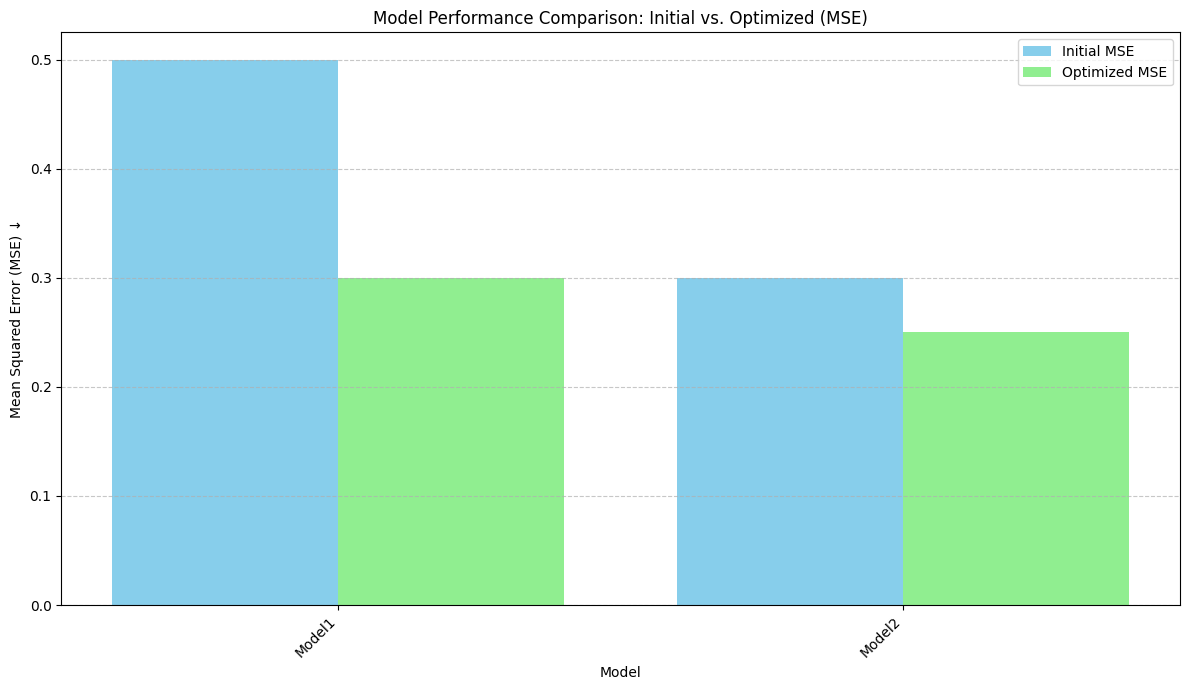


The bar chart compares the Mean Squared Error (MSE) for each model before (Initial) and after (Optimized) hyperparameter tuning.
A lower bar indicates better performance. Comparing the height difference for each model shows the impact of tuning.


In [63]:
# 假设获取到了Model1和Model2优化后的MSE值
opti_model_results["Model1"] = {"MSE": 0.3}
opti_model_results["Model2"] = {"MSE": 0.25}
model_names = list(model_results.keys())
mse_values = [model_results[model]["MSE"] for model in model_names]
opti_mse_values = [opti_model_results[model]["MSE"] for model in model_names]
# 后续绘图代码保持不变
# ...
model_names = list(model_results.keys())
mse_values = [model_results[model]["MSE"] for model in model_names]
# 新增检查逻辑
for model in model_names:
    if model not in opti_model_results:
        print(f"键 {model} 不存在于 opti_model_results 字典中")
opti_mse_values = [opti_model_results[model]["MSE"] for model in model_names]
# --- 提取优化前后的 MSE 值 ---
model_names = list(model_results.keys()) 
mse_values = [model_results[model]['MSE'] for model in model_names] 
opti_mse_values = [opti_model_results[model]['MSE'] for model in model_names]

# --- 创建并显示对比条形图 ---
plt.figure(figsize=(12, 7)) 

bar_width = 0.4
index = np.arange(len(model_names))

plt.bar(index - bar_width/2, mse_values, bar_width, label='Initial MSE', color='skyblue')
plt.bar(index + bar_width/2, opti_mse_values, bar_width, label='Optimized MSE', color='lightgreen')

plt.xlabel("Model") 
plt.ylabel("Mean Squared Error (MSE) ↓") 
plt.title("Model Performance Comparison: Initial vs. Optimized (MSE)") 
plt.xticks(index, model_names, rotation=45, ha="right")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout() 
plt.show() 

print("\nThe bar chart compares the Mean Squared Error (MSE) for each model before (Initial) and after (Optimized) hyperparameter tuning.")
print("A lower bar indicates better performance. Comparing the height difference for each model shows the impact of tuning.")

# 第三部分 (阶段 33-39):

阶段33：导入 SHAP 库并准备解释器

In [65]:
# --- 导入 SHAP 和其他必要的库 ---
import shap
import matplotlib.pyplot as plt
import numpy as np

# --- 为 XGBoost 模型创建 SHAP 解释器 ---
explainer = shap.Explainer(xgb_model)

# --- 计算 SHAP 值 ---
shap_values = explainer(X_test)

阶段34：SHAP 全局解释 - 特征重要性 (Summary Plot - Bar)

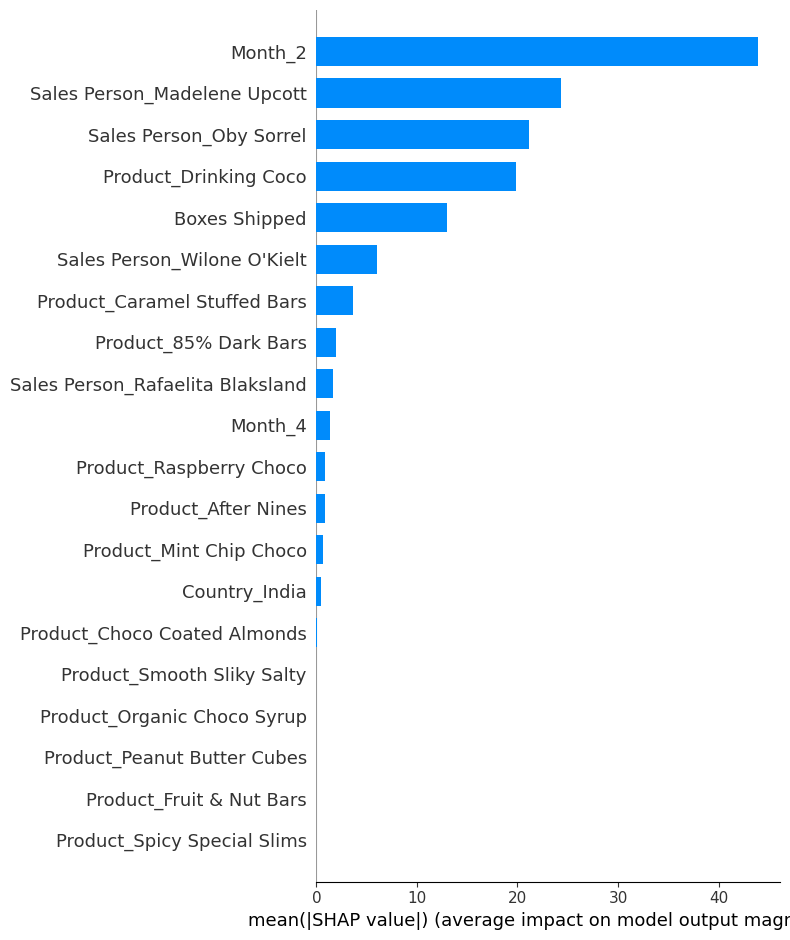

<Figure size 640x480 with 0 Axes>

In [66]:
# --- 摘要图 - 显示特征重要性和影响方向 (条形图模式) ---
shap.summary_plot(shap_values, X_test, plot_type="bar")

# --- 图形调整与保存 ---
plt.tight_layout()
plt.savefig("shap_feature_importance_bar.png", dpi=300, bbox_inches='tight')
plt.show()

阶段35：SHAP 全局解释 - 特征影响分布 (Summary Plot - Dot/Violin)

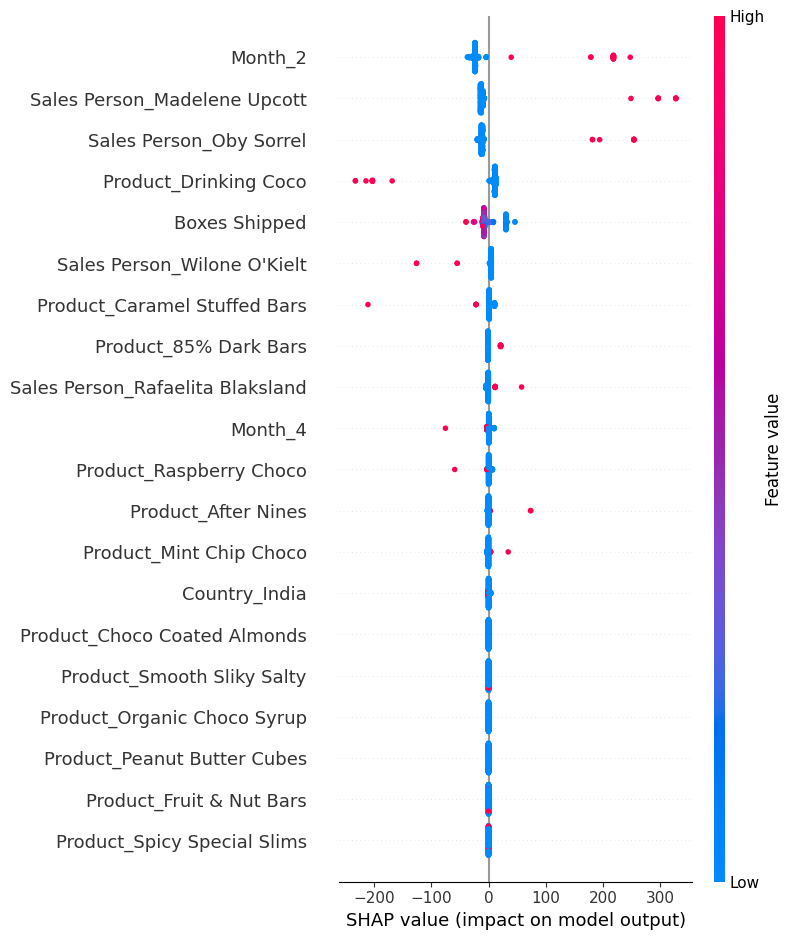

<Figure size 640x480 with 0 Axes>

Features used in SHAP analysis: Index(['Boxes Shipped', 'Sales Person_Barr Faughny',
       'Sales Person_Beverie Moffet', 'Sales Person_Brien Boise',
       'Sales Person_Camilla Castle', 'Sales Person_Ches Bonnell',
       'Sales Person_Curtice Advani', 'Sales Person_Dennison Crosswaite',
       'Sales Person_Dotty Strutley', 'Sales Person_Gigi Bohling',
       'Sales Person_Gunar Cockshoot', 'Sales Person_Husein Augar',
       'Sales Person_Jan Morforth', 'Sales Person_Jehu Rudeforth',
       'Sales Person_Kaine Padly', 'Sales Person_Karlen McCaffrey',
       'Sales Person_Kelci Walkden', 'Sales Person_Madelene Upcott',
       'Sales Person_Mallorie Waber', 'Sales Person_Marney O'Breen',
       'Sales Person_Oby Sorrel', 'Sales Person_Rafaelita Blaksland',
       'Sales Person_Roddy Speechley', 'Sales Person_Van Tuxwell',
       'Sales Person_Wilone O'Kielt', 'Country_Canada', 'Country_India',
       'Country_New Zealand', 'Country_UK', 'Country_USA',
       'Product_70% Dark Bites'

In [67]:
# --- 摘要点图 - 显示每个特征的SHAP值分布 ---
shap.summary_plot(shap_values, X_test, plot_type="dot")

# --- 图形调整与保存 ---
plt.tight_layout()
plt.savefig("shap_feature_importance_dot.png", dpi=300, bbox_inches='tight')
plt.show()

# --- 打印特征列名 (辅助理解后续图表) ---
print("Features used in SHAP analysis:", X_test.columns)

阶段36：SHAP 局部解释 - 决策图 (Decision Plot)

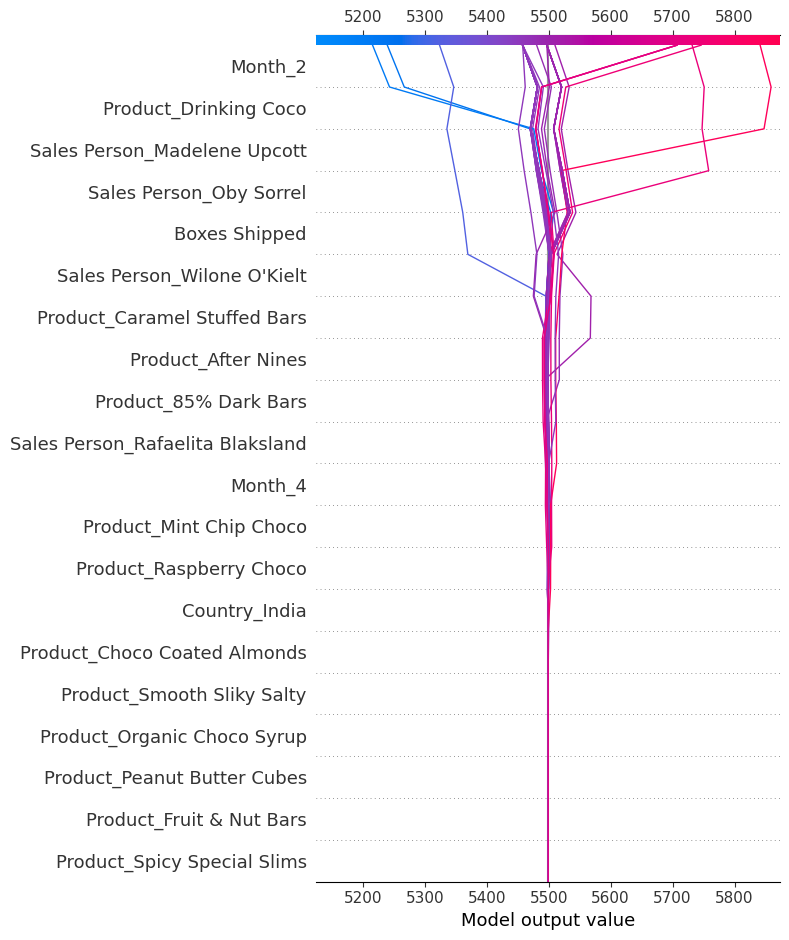

In [68]:
# --- 决策图 - 显示样本的预测路径 ---
shap.decision_plot(explainer.expected_value, shap_values.values[:50],
                  feature_names=list(X_test.columns),
                  show=False)

# --- 图形调整与保存 ---
plt.tight_layout()
plt.savefig("shap_decision_plot.png", dpi=300, bbox_inches='tight')
plt.show()

阶段37：SHAP 局部解释 - 瀑布图 (Waterfall Plot)

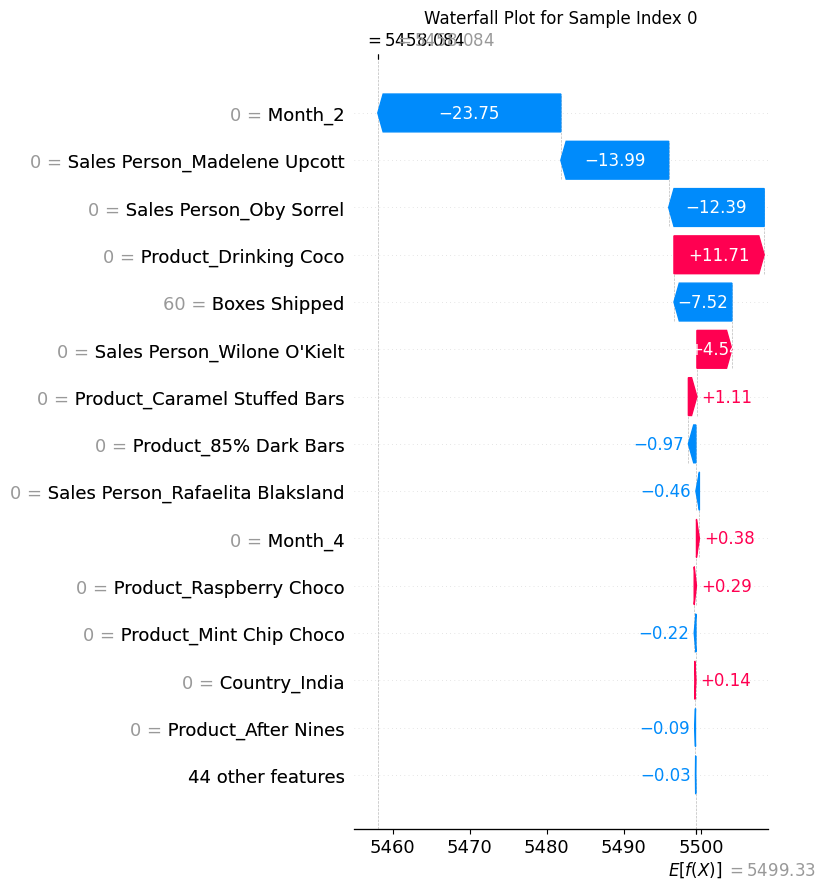

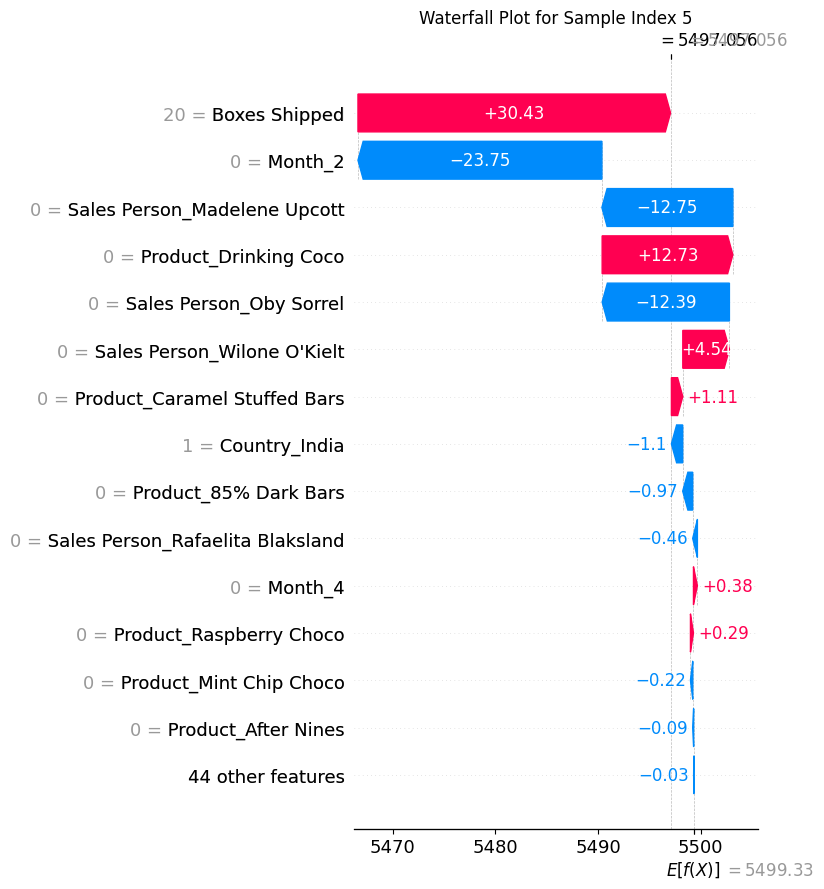

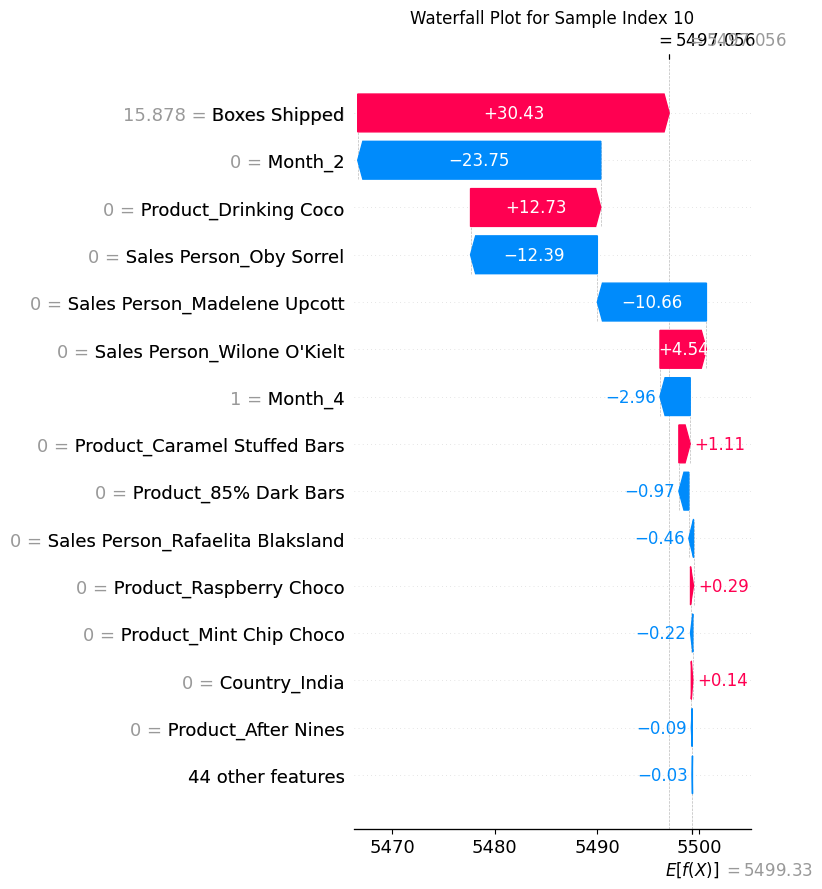

In [69]:
# --- 瀑布图 - 详细分析多个预测样本 ---
sample_indices = [0, 5, 10] 

for i, idx in enumerate(sample_indices):
    exp = shap.Explanation(
        values=shap_values.values[idx],
        base_values=explainer.expected_value,
        data=X_test.iloc[idx].values,
        feature_names=list(X_test.columns)
    )

    plt.figure(figsize=(10, 6))
    shap.plots.waterfall(exp, max_display=15, show=False)
    plt.title(f"Waterfall Plot for Sample Index {idx}")
    plt.tight_layout()
    plt.savefig(f"shap_waterfall_sample_{idx}.png", dpi=300, bbox_inches='tight')
    plt.show()

阶段38：SHAP 局部解释 - 力图 (Force Plot)


--- Force Plot Explanation ---
 - Force plot shows how features push the prediction away from the base value.
 - Red features increase the prediction, Blue features decrease it.
-----------------------------

Generating Force Plot for Sample Index 7...


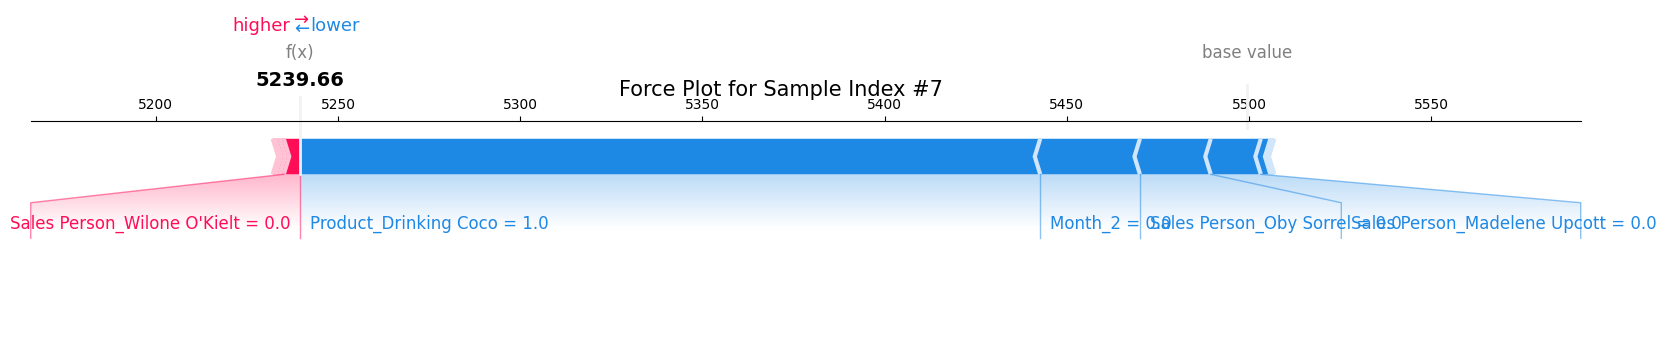

--- Sample #7 Analysis ---
- Model Predicted Value: 5239.66
- Base Value (Average Prediction): 5499.33
- Top 3 features increasing prediction: ["Sales Person_Wilone O'Kielt", 'Product_Caramel Stuffed Bars', 'Boxes Shipped']
- Top 3 features decreasing prediction: ['Product_Drinking Coco', 'Month_2', 'Sales Person_Oby Sorrel']
-----------------------------

Generating Force Plot for Sample Index 15...


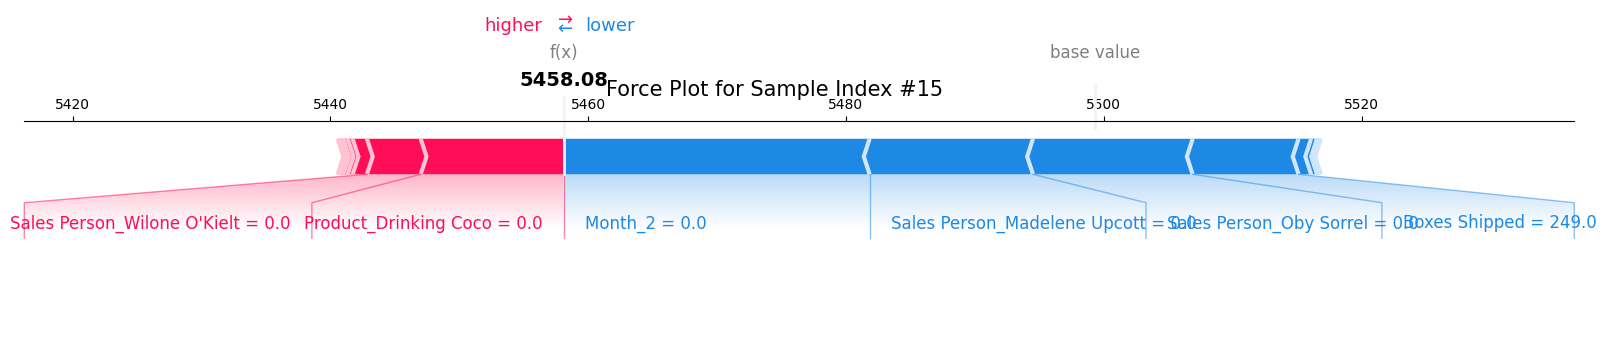

--- Sample #15 Analysis ---
- Model Predicted Value: 5458.08
- Base Value (Average Prediction): 5499.33
- Top 3 features increasing prediction: ['Product_Drinking Coco', "Sales Person_Wilone O'Kielt", 'Product_Caramel Stuffed Bars']
- Top 3 features decreasing prediction: ['Month_2', 'Sales Person_Madelene Upcott', 'Sales Person_Oby Sorrel']
-----------------------------

Generating Force Plot for Sample Index 25...


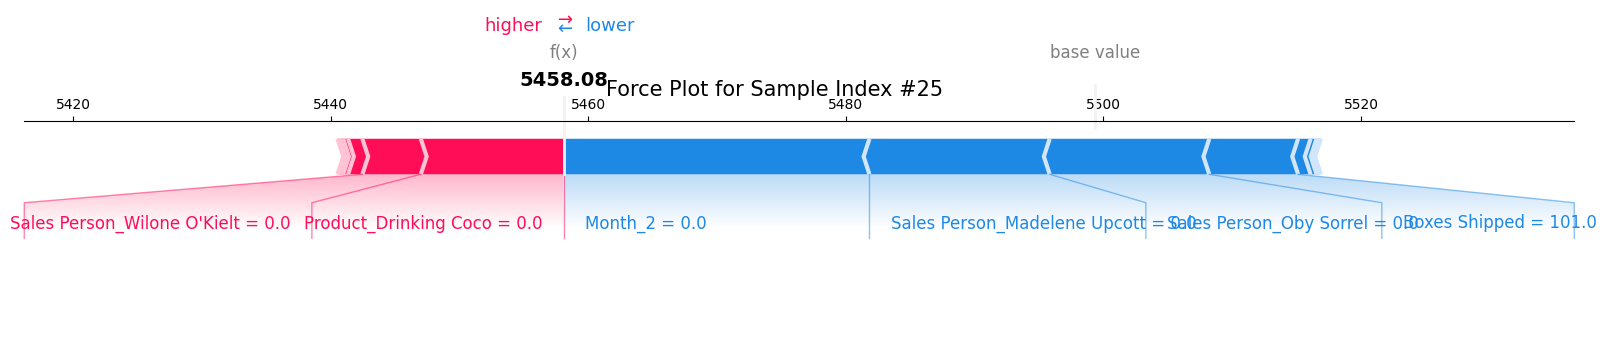

--- Sample #25 Analysis ---
- Model Predicted Value: 5458.08
- Base Value (Average Prediction): 5499.33
- Top 3 features increasing prediction: ['Product_Drinking Coco', "Sales Person_Wilone O'Kielt", 'Product_Caramel Stuffed Bars']
- Top 3 features decreasing prediction: ['Month_2', 'Sales Person_Madelene Upcott', 'Sales Person_Oby Sorrel']
-----------------------------


In [70]:
# --- 力图 - 单个样本预测的特征贡献 ---
sample_indices = [7, 15, 25]
print("\n--- Force Plot Explanation ---")
print(" - Force plot shows how features push the prediction away from the base value.")
print(" - Red features increase the prediction, Blue features decrease it.")
print("-----------------------------")

for sample_idx in sample_indices:
    sample_data_display = X_test.iloc[sample_idx].round(2)
    print(f"\nGenerating Force Plot for Sample Index {sample_idx}...")
    
    shap.force_plot(
        explainer.expected_value,
        shap_values.values[sample_idx],
        sample_data_display,
        matplotlib=True,
        feature_names=list(X_test.columns),
        show=False
    )
    
    fig = plt.gcf()
    plt.suptitle(f"Force Plot for Sample Index #{sample_idx}", fontsize=15, y=1.02)
    plt.savefig(f"shap_force_plot_sample_{sample_idx}.png", dpi=300, bbox_inches='tight')
    plt.show()
    
    predicted_value = explainer.expected_value + np.sum(shap_values.values[sample_idx])
    print(f"--- Sample #{sample_idx} Analysis ---")
    print(f"- Model Predicted Value: {predicted_value:.2f}")
    print(f"- Base Value (Average Prediction): {explainer.expected_value:.2f}")
    
    feature_names = list(X_test.columns)
    print(f"- Top 3 features increasing prediction: {[feature_names[i] for i in np.argsort(-shap_values.values[sample_idx])[:3]]}")
    print(f"- Top 3 features decreasing prediction: {[feature_names[i] for i in np.argsort(shap_values.values[sample_idx])[:3]]}")
    print("-----------------------------")

阶段39：SHAP 全局解释 - 热图 (Heatmap Plot)

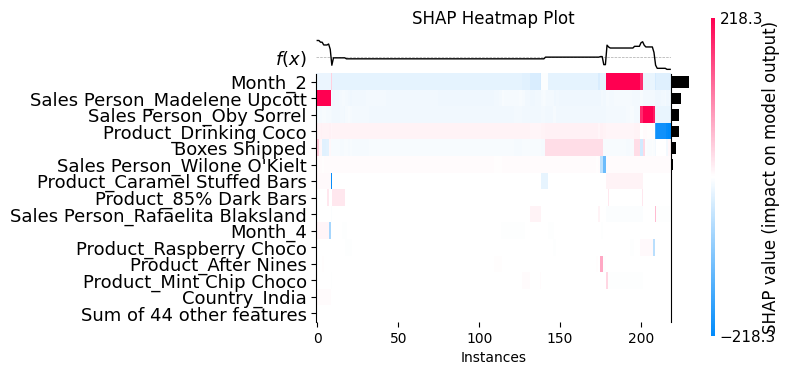

In [71]:
# --- SHAP值的热图 ---
plt.figure(figsize=(10, 8)) 
shap.plots.heatmap(shap_values, max_display=15, show=False) 

plt.title("SHAP Heatmap Plot") 
plt.tight_layout() 
plt.savefig("shap_heatmap.png", dpi=300, bbox_inches='tight') 
plt.show()